In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
DF = pd.read_csv("../datasets/traffic_counts.csv",low_memory=False)
DF

,Timestamp,Site,Right,Left,Northbound,Southbound,Eastbound,Westbound,Total,Latitude,Longitude,Location
0,26/06/2020 11:45:00 PM,Pembina And 280 N Of Adamar,118,107,107.0,118.0,NaN,NaN,225,49.826952,-97.152312,POINT (-97.152312 49.826952)
1,26/06/2020 11:45:00 PM,Henderson And 55M S Of Frasers Grove,110,71,110.0,71.0,NaN,NaN,181,49.934985,-97.096166,POINT (-97.096166 49.934985)
2,26/06/2020 11:00:00 PM,McPhillips And 190m South Of Leila,139,149,139.0,149.0,NaN,NaN,288,49.951733,-97.149032,POINT (-97.149032 49.951733)
3,26/06/2020 11:15:00 PM,Nichol And St.Marys,86,83,83.0,86.0,NaN,NaN,169,49.850579,-97.112202,POINT (-97.112202 49.850579)
4,26/06/2020 11:15:00 PM,Inkster And 130W Of Wyatt,126,96,NaN,NaN,126.0,96.0,222,49.945949,-97.187758,POINT (-97.187758 49.945949)
...,...,...,...,...,...,...,...,...,...,...,...,...
502391,07/10/2021 02:00:00 PM,Marion And 260M E Of Dupuy,170,174,NaN,NaN,170.0,174.0,344,49.881900,-97.089342,POINT (-97.089342 49.8819)
502392,07/10/2021 11:15:00 AM,Lagimodiere And 80M N Of Burmac,277,235,235.0,277.0,NaN,NaN,512,49.848695,-97.049665,POINT (-97.049665 49.848695)
502393,07/10/2021 10:00:00 PM,Lagimodiere And 80M N Of Burmac,122,120,120.0,122.0,NaN,NaN,242,49.848695,-97.049665,POINT (-97.049665 49.848695)
502394,07/10/2021 07:15:00 AM,Pembina And 280 N Of Adamar,179,382,382.0,179.0,NaN,NaN,561,49.826952,-97.152312,POINT (-97.152312 49.826952)


In [42]:
for col in DF.columns:
    print(col,DF[col].dtype)

Timestamp object
Site object
Right int64
Left int64
Northbound float64
Southbound float64
Eastbound float64
Westbound float64
Total int64
Latitude float64
Longitude float64
Location object


# Data Preprocessing
1. Convert Timestamp, selecting only periods of interest
2. Analyze relationship between Site x Location and {Right,Left} x {N,S,W,E}
3. Clean columns if possible

In [45]:
#1
DF['Timestamp'] = pd.to_datetime(DF['Timestamp'])
print(DF['Timestamp'].dtype)
START_DATE = pd.to_datetime('Aug 1 2021'); END_DATE = pd.to_datetime('Sep 1 2021')
cond = (START_DATE < DF["Timestamp"]) & (DF["Timestamp"] < END_DATE)
DF = DF[cond]
DF

datetime64[ns]


<ipython-input-45-af26bbd32c52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['Timestamp'] = pd.to_datetime(DF['Timestamp'])


,Timestamp,Site,Right,Left,Northbound,Southbound,Eastbound,Westbound,Total,Latitude,Longitude,Location
308118,2021-08-01 20:00:00,McPhillips And 190m South Of Leila,170,152,170.0,152.0,NaN,NaN,322,49.951733,-97.149032,POINT (-97.149032 49.951733)
308119,2021-08-01 02:00:00,McPhillips And 190m South Of Leila,14,15,14.0,15.0,NaN,NaN,29,49.951733,-97.149032,POINT (-97.149032 49.951733)
308120,2021-08-01 19:30:00,McPhillips And 190m South Of Leila,181,161,181.0,161.0,NaN,NaN,342,49.951733,-97.149032,POINT (-97.149032 49.951733)
308121,2021-08-01 11:15:00,McPhillips And 190m South Of Leila,178,262,178.0,262.0,NaN,NaN,440,49.951733,-97.149032,POINT (-97.149032 49.951733)
308122,2021-08-01 04:15:00,Henderson And 55M S Of Frasers Grove,12,12,12.0,12.0,NaN,NaN,24,49.934985,-97.096166,POINT (-97.096166 49.934985)
...,...,...,...,...,...,...,...,...,...,...,...,...
490102,2021-08-24 14:00:00,Marion And 260M E Of Dupuy,180,198,NaN,NaN,180.0,198.0,378,49.881900,-97.089342,POINT (-97.089342 49.8819)
490103,2021-08-24 11:15:00,Lagimodiere And 80M N Of Burmac,282,249,249.0,282.0,NaN,NaN,531,49.848695,-97.049665,POINT (-97.049665 49.848695)
490104,2021-08-24 22:00:00,Lagimodiere And 80M N Of Burmac,171,127,127.0,171.0,NaN,NaN,298,49.848695,-97.049665,POINT (-97.049665 49.848695)
490105,2021-08-24 07:15:00,Pembina And 280 N Of Adamar,131,326,326.0,131.0,NaN,NaN,457,49.826952,-97.152312,POINT (-97.152312 49.826952)


In [46]:
df1a = DF[["Northbound","Southbound"]].dropna().rename(columns={"Northbound":"L","Southbound":"R"})
df1b = DF[["Eastbound","Westbound"]].dropna().rename(columns={"Eastbound":"L","Westbound":"R"})
DF = DF.drop(columns=["Right","Left","Northbound","Southbound","Eastbound","Westbound","Location","Site"])
DF = DF.rename(columns={"Latitude":"Lat","Longitude":"Long"})
DF.loc[:,["L","R"]] =  pd.concat([df1a,df1b],axis=0)
DF

,Timestamp,Total,Lat,Long,L,R
308118,2021-08-01 20:00:00,322,49.951733,-97.149032,170.0,152.0
308119,2021-08-01 02:00:00,29,49.951733,-97.149032,14.0,15.0
308120,2021-08-01 19:30:00,342,49.951733,-97.149032,181.0,161.0
308121,2021-08-01 11:15:00,440,49.951733,-97.149032,178.0,262.0
308122,2021-08-01 04:15:00,24,49.934985,-97.096166,12.0,12.0
...,...,...,...,...,...,...
490102,2021-08-24 14:00:00,378,49.881900,-97.089342,180.0,198.0
490103,2021-08-24 11:15:00,531,49.848695,-97.049665,249.0,282.0
490104,2021-08-24 22:00:00,298,49.848695,-97.049665,127.0,171.0
490105,2021-08-24 07:15:00,457,49.826952,-97.152312,326.0,131.0


In [58]:
#2
# DF[['Lat','Long']].value_counts()
DF_STATION = DF[["Lat","Long"]].value_counts().to_frame().reset_index().rename(columns={0:"count"})
DF_STATION

,Lat,Long,count
0,49.826952,-97.152312,2687
1,49.848695,-97.049665,2687
2,49.850579,-97.112202,2687
3,49.881900,-97.089342,2687
4,49.906744,-97.123028,2687
5,49.945949,-97.187758,2687
6,49.951733,-97.149032,2687
7,49.934985,-97.096166,2686


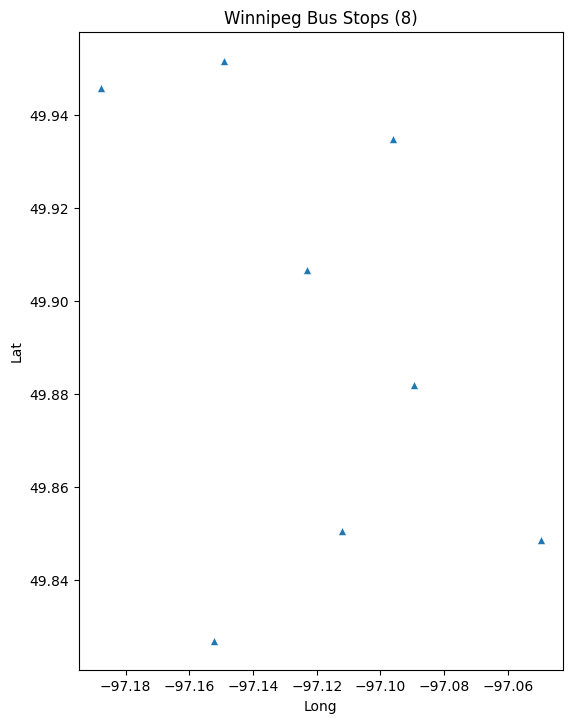

In [60]:
SIZE = 50
cols = ["Lat","Long"]
lg,lt = DF_STATION[cols].max() - DF_STATION[cols].min()
plt.figure(figsize=(SIZE*lg,(SIZE*1.2)*lt))
sns.scatterplot(data=DF_STATION,x='Long',y='Lat',palette="rainbow",marker='^')
plt.title(f"Winnipeg Bus Stops ({len(DF_STATION)})")
plt.show()

In [65]:
print(DF_STATION[cols].values)

[[ 49.826952 -97.152312]
 [ 49.848695 -97.049665]
 [ 49.850579 -97.112202]
 [ 49.8819   -97.089342]
 [ 49.906744 -97.123028]
 [ 49.945949 -97.187758]
 [ 49.951733 -97.149032]
 [ 49.934985 -97.096166]]
